In [35]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

Dataframe created (deaths/age group):
  AgeGroup  Deaths
0    00-10       0
1    10-20       0
2    20-30      13
3    30-40      26
4    40-50      60
5    50-60     144
6    60-70     346
7    70-80     936
8      80-    2752
Analysing deaths per age group



NameError: name 'pp' is not defined

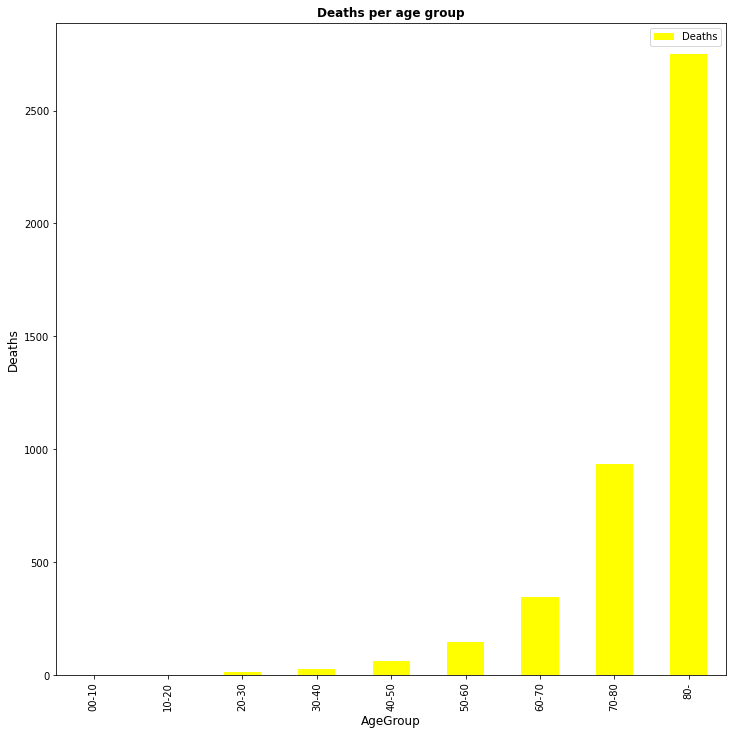

In [15]:
"""
 Deaths per age group
 https://sampo.thl.fi/pivot/prod/fi/epirapo/covid19case/fact_epirapo_covid19case.json?row=ttr10yage-444309&column=dateweek20200101-509030.&filter=measure-492118
"""

 # Read data
file = open('death_by_age.json')
content = json.load(file)
 
 # Structure data
data = {"AgeGroup" : [], "Deaths" : []}
indices = content["dataset"]['dimension']["ttr10yage"]["category"]["index"]

 # Connect "age group" to "deaths" by indices defined in json data
for i in indices:
    data["AgeGroup"].append(content["dataset"]['dimension']["ttr10yage"]["category"]["label"][i])
    # Not all values are integers (eg. "..")
    try:
        data["Deaths"].append(int(content["dataset"]['value'][str(indices[i])]))
    except:
        data["Deaths"].append(0)


 # Create dataframe
dataframe = pd.DataFrame(data)
dataframe.describe()
dataframe = dataframe.drop(9) # Remove "all age groups" row
print ("Dataframe created (deaths/age group):")
print(dataframe)

print ('Analysing deaths per age group\n')
fig, ax = plt.subplots(figsize=(12, 12))
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('Age group', fontsize=12)
ax.set_ylabel('Deaths' , fontsize=12)
ax.set_title('Deaths per age group', fontsize=12, fontweight='bold')

dataframe.plot(y="Deaths", x="AgeGroup", ax=ax, kind='bar', color='yellow')
plt.savefig('deaths_per_age_group.png', format='png')
#pp.savefig("deaths per age group")

Dataframe created (infections/municipality):
                  municipality  infections
0       Pohjois-Pohjanmaan SHP       64149
1         PÃ¤ijÃ¤t-HÃ¤meen SHP       37829
2          EtelÃ¤-Karjalan SHP       24596
3                   Vaasan SHP       39341
4                  Kainuun SHP       15658
5                   Ahvenanmaa        9598
6             EtelÃ¤-Savon SHP       21745
7               Satakunnan SHP       35077
8               ItÃ¤-Savon SHP        7011
9             Kymenlaakson SHP       34526
10           LÃ¤nsi-Pohjan SHP        8070
11  Helsingin ja Uudenmaan SHP      434623
12        Varsinais-Suomen SHP       84554
13           Kanta-HÃ¤meen SHP       24115
15           Pohjois-Savon SHP       30546
16                   Lapin SHP       18038
17       EtelÃ¤-Pohjanmaan SHP       25462
18        Keski-Pohjanmaan SHP       14237
19              Pirkanmaan SHP       86351
20            Keski-Suomen SHP       34206
21        Pohjois-Karjalan SHP       20008


NameError: name 'pp' is not defined

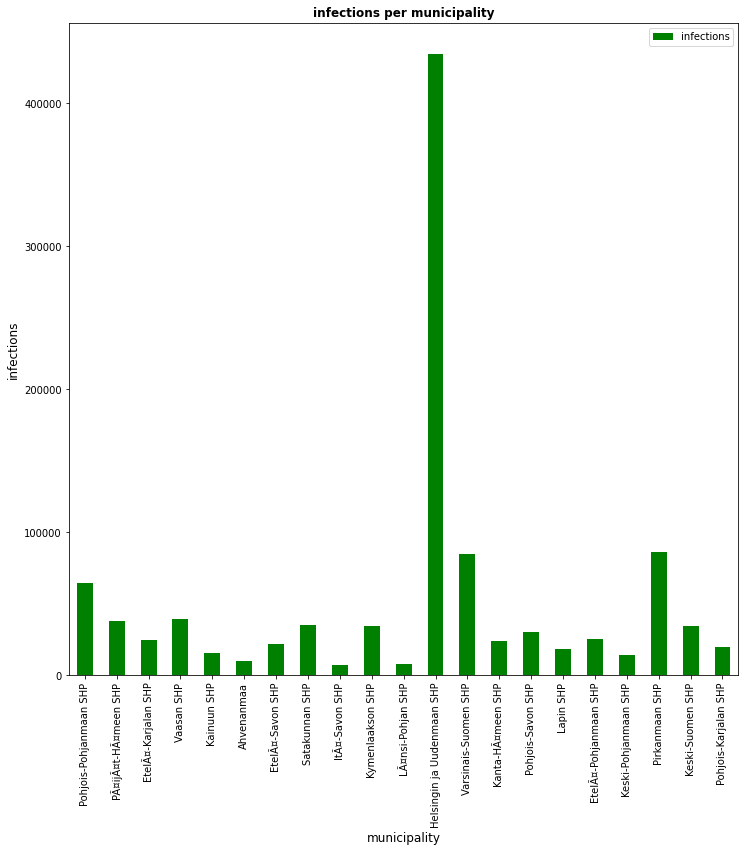

In [14]:
"""
 Infections per municipality
 https://sampo.thl.fi/pivot/prod/fi/epirapo/covid19case/fact_epirapo_covid19case.json?column=hcdmunicipality2020-445222
"""
 # Read data
file = open('infections_per_municipality.json')
content = json.load(file)
 

#Structure data
data = {"municipality":[],"infections":[]}
indices = content["dataset"]['dimension']["hcdmunicipality2020"]["category"]["index"]

 # Connect "age group" to "deaths" by indices defined in json data
for i in indices:
    data["municipality"].append(content["dataset"]['dimension']["hcdmunicipality2020"]["category"]["label"][i])
    # Not all values are integers (eg. "..")
    try:
        data["infections"].append(int(content["dataset"]['value'][str(indices[i])]))
    except:
        data["infections"].append(0)
        
 # Create dataframe
dataframe = pd.DataFrame(data)
dataframe = dataframe.drop(14)
dataframe.describe()
print ("Dataframe created (infections/municipality):")
print(dataframe)

fig, ax = plt.subplots(figsize=(12, 12))
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('municipality', fontsize=12)
ax.set_ylabel('infections' , fontsize=12)
ax.set_title('infections per municipality', fontsize=12, fontweight='bold')

dataframe.plot(y="infections", x="municipality", ax=ax, kind='bar', color='green')
plt.savefig('infections_per_municipality.png', format='png')
pp.savefig("infections per municipality.png")


         academic year  visits1
0    Kaikki lukuvuodet   805741
1  Lukuvuosi 2015/2016   134047
2  Lukuvuosi 2016/2017   144068
3  Lukuvuosi 2017/2018   140879
4  Lukuvuosi 2018/2019   139473
5  Lukuvuosi 2019/2020   121345
6  Lukuvuosi 2020/2021   125929


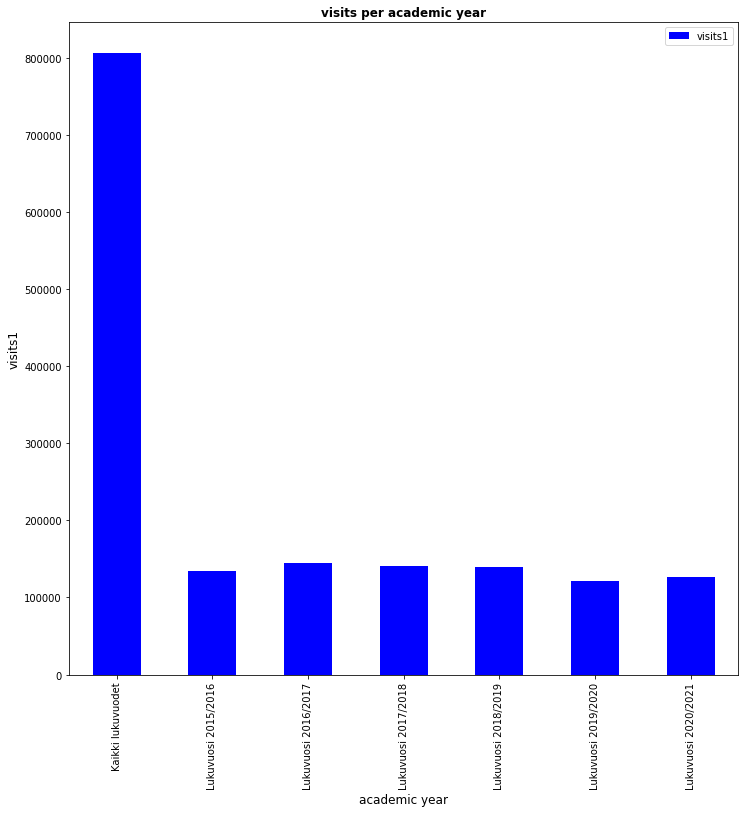

In [45]:
"""
Student visits per year
https://sampo.thl.fi/pivot/prod/fi/avo/opiskelu02/fact_ahil_opiskelu02.json?column=aika-27020
"""
    
#Read data
file = open('student_visits_year.json')
content = json.load(file)
 

#Structure data
data = {"academic year":[],"visits1":[]}
indices = content["dataset"]['dimension']["aika"]["category"]["index"]

 # Connect "age group" to "deaths" by indices defined in json data
for i in indices:
    data["academic year"].append(content["dataset"]['dimension']["aika"]["category"]["label"][i])
    # Not all values are integers (eg. "..")
    try:
        data["visits1"].append(int(content["dataset"]['value'][str(indices[i])]))
    except:
        data["visits1"].append(0)
        
 # Create dataframe
dataframe1 = pd.DataFrame(data)
#dataframe['visits'] = dataframe['visits'].astype(int)
#dataframe = dataframe.drop(14)
dataframe1.describe()
#print ("Dataframe created (infections/municipality):")
print(dataframe1)

fig, ax = plt.subplots(figsize=(12, 12))
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('academic year', fontsize=12)
ax.set_ylabel('visits1' , fontsize=12)
ax.set_title('visits per academic year', fontsize=12, fontweight='bold')

dataframe1.plot(y="visits1", x='academic year', ax=ax, kind='bar', color='blue')
plt.savefig('infections_per_municipality.png', format='png')
#pp.savefig("infections per municipality.png")


         academic year  visits
0    Kaikki lukuvuodet  575644
1  Lukuvuosi 2015/2016   73176
2  Lukuvuosi 2016/2017   88039
3  Lukuvuosi 2017/2018   91778
4  Lukuvuosi 2018/2019   98808
5  Lukuvuosi 2019/2020   98986
6  Lukuvuosi 2020/2021  124857


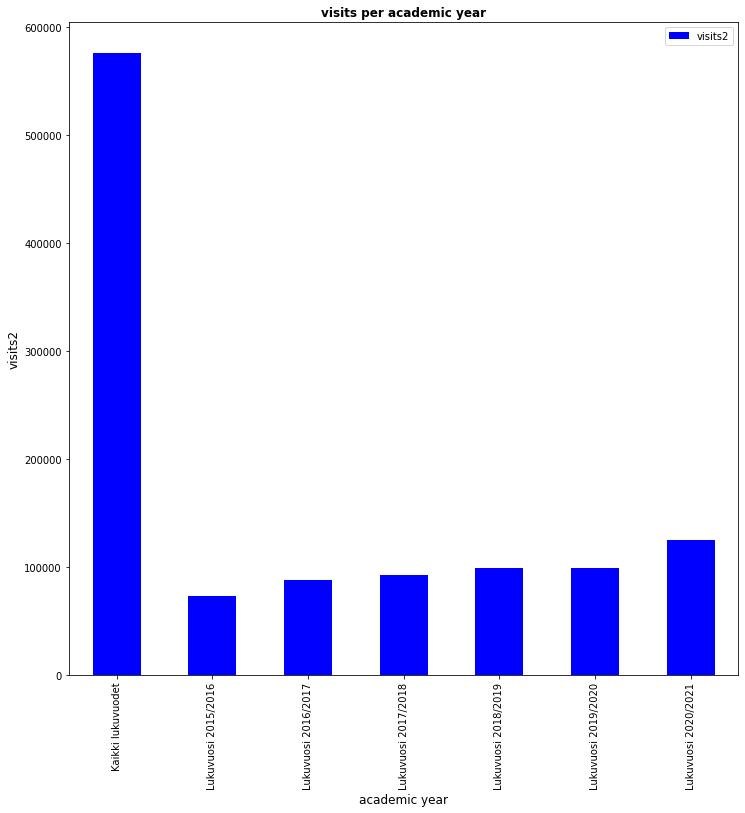

In [42]:
""""
University and polytechnic students use of healthcareservices
https://sampo.thl.fi/pivot/prod/fi/avo/opiskelu03/fact_ahil_opiskelu03.json?column=aika-27020
"""

#Read data
file = open('higher_student_visits.json')
content = json.load(file)
 

#Structure data
data = {"academic year":[],"visits2":[]}
indices = content["dataset"]['dimension']["aika"]["category"]["index"]

 # Connect "age group" to "deaths" by indices defined in json data
for i in indices:
    data["academic year"].append(content["dataset"]['dimension']["aika"]["category"]["label"][i])
    # Not all values are integers (eg. "..")
    try:
        data["visits2"].append(int(content["dataset"]['value'][str(indices[i])]))
    except:
        data["visits2"].append(0)
        
 # Create dataframe
dataframe2 = pd.DataFrame(data)
#dataframe['visits'] = dataframe['visits'].astype(int)
#dataframe = dataframe.drop(14)
dataframe2.describe()
#print ("Dataframe created (infections/municipality):")
print(dataframe)

fig, ax = plt.subplots(figsize=(12, 12))
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('academic year', fontsize=12)
ax.set_ylabel('visits2' , fontsize=12)
ax.set_title('visits per academic year', fontsize=12, fontweight='bold')

dataframe2.plot(y="visits2", x='academic year', ax=ax, kind='bar', color='blue')
plt.savefig('infections_per_municipality.png', format='png')
#pp.savefig("infections per municipality.png")


In [47]:
# What percentage of university and polytechnic students used 

high = dataframe2['visits2']
dataframe1 = dataframe1.join(high)
dataframe1

,academic year,visits1,visits2
0,Kaikki lukuvuodet,805741,575644
1,Lukuvuosi 2015/2016,134047,73176
2,Lukuvuosi 2016/2017,144068,88039
3,Lukuvuosi 2017/2018,140879,91778
4,Lukuvuosi 2018/2019,139473,98808
5,Lukuvuosi 2019/2020,121345,98986
6,Lukuvuosi 2020/2021,125929,124857


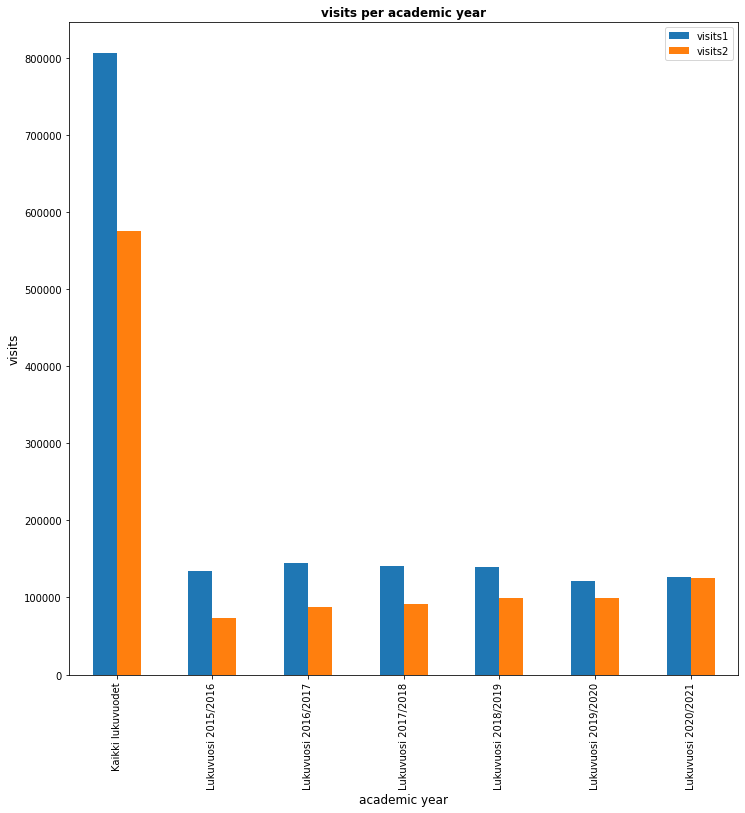

In [51]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('academic year', fontsize=12)
ax.set_ylabel('visits' , fontsize=12)
ax.set_title('visits per academic year', fontsize=12, fontweight='bold')

dataframe1.plot(y=['visits1','visits2'], x='academic year', ax=ax, kind='bar')
plt.savefig('infections_per_municipality.png', format='png')

# Infektioner per kön

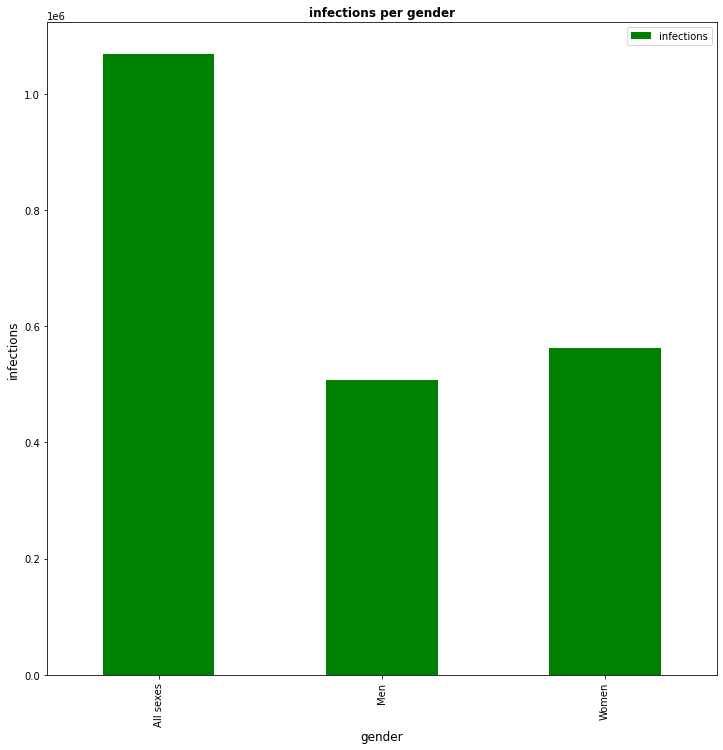

In [54]:
#https://sampo.thl.fi/pivot/prod/en/epirapo/covid19case/fact_epirapo_covid19case.json?column=sex-444328

"""
 Infections per municipality
 https://sampo.thl.fi/pivot/prod/fi/epirapo/covid19case/fact_epirapo_covid19case.json?column=hcdmunicipality2020-445222
"""
 # Read data
file = open('infections_gender.json')
content = json.load(file)
 

#Structure data
data = {"gender":[],"infections":[]}
indices = content["dataset"]['dimension']["sex"]["category"]["index"]

 # Connect "age group" to "deaths" by indices defined in json data
for i in indices:
    data["gender"].append(content["dataset"]['dimension']["sex"]["category"]["label"][i])
    # Not all values are integers (eg. "..")
    try:
        data["infections"].append(int(content["dataset"]['value'][str(indices[i])]))
    except:
        data["infections"].append(0)
        
 # Create dataframe
dataframe = pd.DataFrame(data)
dataframe.describe()

fig, ax = plt.subplots(figsize=(12, 12))
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('gender', fontsize=12)
ax.set_ylabel('infections' , fontsize=12)
ax.set_title('infections per gender', fontsize=12, fontweight='bold')

dataframe.plot(y="infections", x="gender", ax=ax, kind='bar', color='green')
plt.savefig('infections per gender.png', format='png')


# Infections per week

                 week  infections
1   Year 2021 Week 02       40844
2   Year 2021 Week 05       56006
3   Year 2021 Week 03       58191
4   Year 2020 Week 53        5687
5   Year 2021 Week 01       15938
..                ...         ...
70  Year 2022 Week 16       37697
71  Year 2022 Week 17       35206
72  Year 2022 Week 18       26638
73  Year 2022 Week 19       25194
74  Year 2022 Week 20        3852

[74 rows x 2 columns]


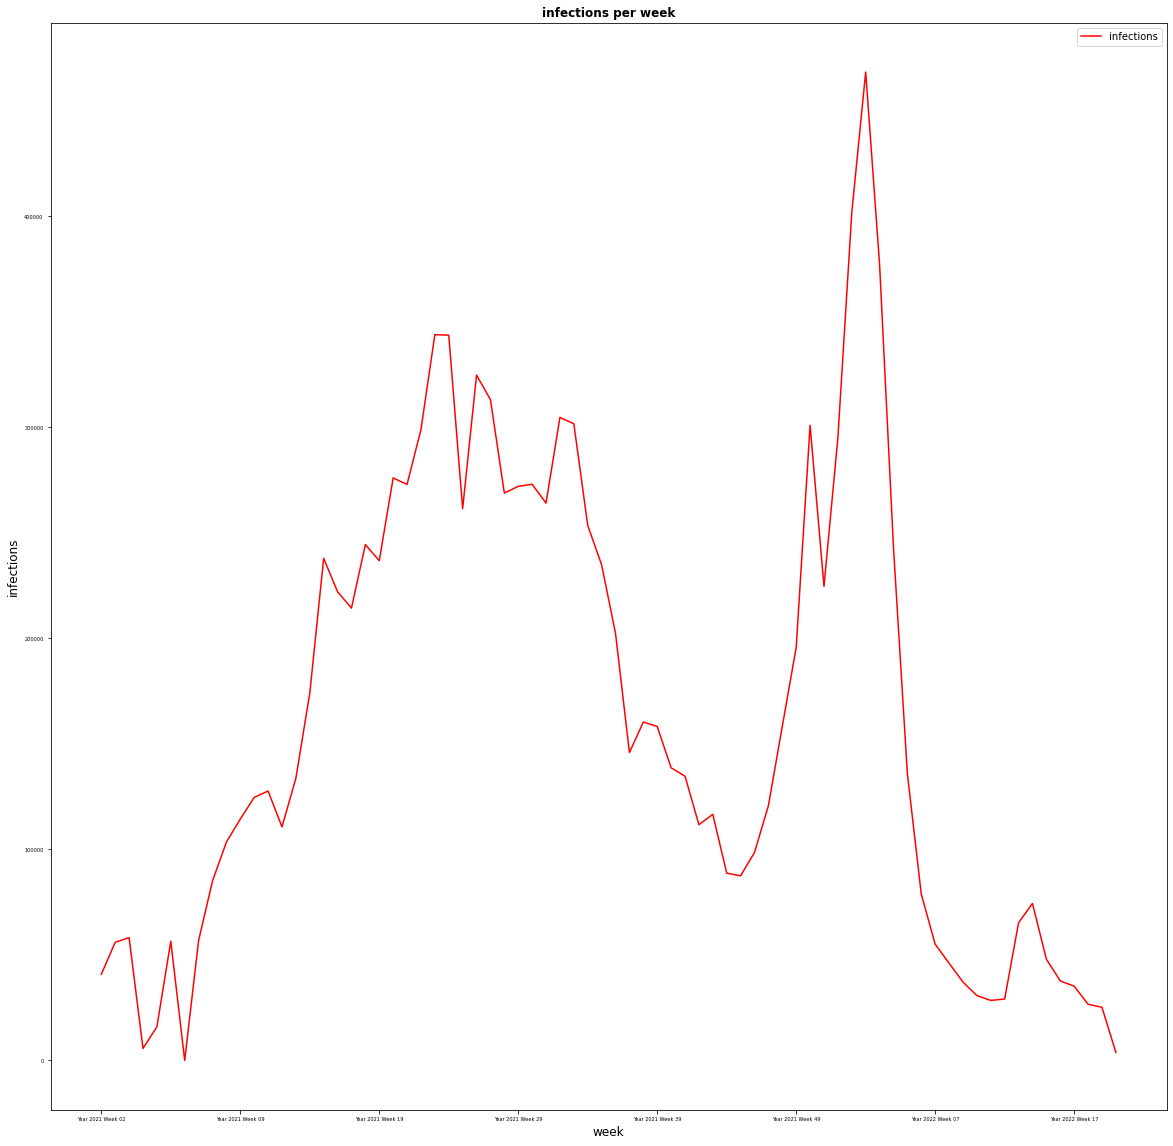

In [59]:
"""
https://sampo.thl.fi/pivot/prod/en/vaccreg/cov19cov/fact_cov19cov.json?column=dateweek20201226-525425
"""

file = open('infections_week.json')
content = json.load(file)
 

#Structure data
data = {"week":[],"infections":[]}
indices = content["dataset"]['dimension']["dateweek20201226"]["category"]["index"]

 # Connect "age group" to "deaths" by indices defined in json data
for i in indices:
    data["week"].append(content["dataset"]['dimension']["dateweek20201226"]["category"]["label"][i])
    # Not all values are integers (eg. "..")
    try:
        data["infections"].append(int(content["dataset"]['value'][str(indices[i])]))
    except:
        data["infections"].append(0)
        
 # Create dataframe
dataframe = pd.DataFrame(data)
dataframe = dataframe.drop(0)
dataframe.describe()

fig, ax = plt.subplots(figsize=(20, 20))
ax.tick_params(axis='x', labelsize=5)
ax.tick_params(axis='y', labelsize=5)

ax.set_xlabel('week', fontsize=12)
ax.set_ylabel('infections' , fontsize=12)
ax.set_title('infections per week', fontsize=12, fontweight='bold')

print(dataframe)

dataframe.plot(y="infections", x="week", ax=ax, kind='line', color='red')
plt.savefig('infections per week.png', format='png')

